In [98]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("."))

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline

['Extra_Package', '.DS_Store', 'housing1.ipynb', 'test.csv', 'housing2.ipynb', 'data_description.txt', 'train.csv', '.ipynb_checkpoints', 'kernelf2d782ba70.ipynb', 'sample_submission.csv']


In [99]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

train_label_df = train_df['SalePrice']
train_df = train_df.drop(['Id','SalePrice'],axis=1)
test_df = test_df.drop('Id',axis=1)



test_length = len(test_df)
train_length = len(train_df)

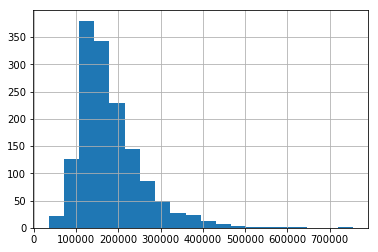

In [100]:
train_label_df.hist(bins=20)

In [101]:

all_sample = pd.concat([train_df,test_df])

In [102]:
all_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [103]:
all_sample['MSSubClass'] = pd.Categorical(all_sample.MSSubClass)

In [104]:
def get_nanbycol (data):
    all_nan = data.isnull().sum(axis = 0)
    nan_df = pd.DataFrame(all_nan,columns=['nans'])
    abovezero = nan_df[nan_df['nans']>0]
    return abovezero
get_nanbycol(all_sample)

,nans
MSZoning,4
LotFrontage,486
Alley,2721
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,24
MasVnrArea,23
BsmtQual,81
BsmtCond,82


In [105]:
num_col = list(all_sample._get_numeric_data().columns)
num_col

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [106]:
cat_col = list(set(all_sample.columns) - set(num_col))
len(cat_col)

44

In [107]:
#from Extra_Package.fill_missing_value import Categorical_Imputer
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import Imputer

In [108]:
num_imputer = Imputer(strategy='most_frequent')
all_sample[num_col] = num_imputer.fit_transform(all_sample[num_col])

/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [109]:
all_sample[num_col].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [110]:
#Standandize the numeric 
from sklearn.preprocessing import StandardScaler
all_sample[num_col] = StandardScaler().fit_transform(all_sample[num_col])


In [111]:
#check sanity
##all_sample['BldgType'].value_counts()

all_sample[num_col].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.127678,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,-0.293025,-0.934165,...,0.349364,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
1,0.567125,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,-0.293025,-0.629284,...,-0.058991,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962
2,0.011283,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,-0.293025,-0.287999,...,0.627787,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646
3,-0.359279,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,-0.293025,-0.046824,...,0.785561,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569
4,0.752406,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,-0.293025,-0.160586,...,1.685798,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,2.132012,0.157646


In [112]:

#from sklearn_pandas import CategoricalImputer
from sklearn.base import TransformerMixin
import numpy as np
import pandas as pd 

class Categorical_Imputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
        #self.strategy = strategy


    def fit_transform(self,X,y=None):
        col_all = X.columns
        for col in col_all:
            #print(col,' ',X[col].value_counts().index[0])
            X[col].fillna(X[col].value_counts().index[0],inplace=True)
            #X[col].fillna(X[col].value_counts().index[0])
            #X.info()
        return X
 

In [113]:
cate_imputer = Categorical_Imputer()
#cate_imputer.fit(all_sample[cat_col])
all_sample[cat_col] = cate_imputer.fit_transform(all_sample[cat_col])

/Users/kehindetomiwa/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [114]:
get_nanbycol(all_sample)

,nans


looks like the filler worked, I need to investigate the settingwithcopywarning 

In [134]:
all_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null category
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null float64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null float64
OverallCond      2919 non-null float64
YearBuilt        2919 non-null float64
YearRemodAdd     2919 non-null float64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_sample[cat_col] = all_sample[cat_col].apply(lambda col: le.fit_transform(col))

all_sample[cat_col].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 44 columns):
MiscFeature      2919 non-null int64
LandSlope        2919 non-null int64
KitchenQual      2919 non-null int64
Fence            2919 non-null int64
Street           2919 non-null int64
ExterCond        2919 non-null int64
BsmtExposure     2919 non-null int64
HeatingQC        2919 non-null int64
HouseStyle       2919 non-null int64
LandContour      2919 non-null int64
CentralAir       2919 non-null int64
Condition1       2919 non-null int64
PavedDrive       2919 non-null int64
Exterior2nd      2919 non-null int64
GarageQual       2919 non-null int64
FireplaceQu      2919 non-null int64
Alley            2919 non-null int64
Condition2       2919 non-null int64
RoofMatl         2919 non-null int64
MSZoning         2919 non-null int64
BsmtQual         2919 non-null int64
Utilities        2919 non-null int64
Electrical       2919 non-null int64
RoofStyle        2919 non-null int64
BsmtC

In [136]:
#from sklearn.preprocessing import OneHotEncoder
#cat_columns = list(cat_col)
#column_mask = []
#for column_name in list(all_sample.columns.values):
#    column_mask.append(column_name in cat_col)
#ohe = OneHotEncoder(categorical_features = column_mask, sparse=False ) 
#X_ohe = ohe.fit_transform(all_sample)
#X_ohe.shape

In [137]:
#len(ohe.feature_indices_)

In [138]:
all_sample = pd.get_dummies(all_sample)
all_sample.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,-0.127678,-0.217879,1,0,3,3,0,4,...,-0.285935,-0.06315,0,2,2,-0.089592,-1.552184,0.157646,8,4
1,0,3,0.567125,-0.072044,1,0,3,3,0,2,...,-0.285935,-0.06315,0,2,2,-0.089592,-0.446925,-0.602962,8,4
2,5,3,0.011283,0.137197,1,0,0,3,0,4,...,-0.285935,-0.06315,0,2,2,-0.089592,1.026753,0.157646,8,4
3,6,3,-0.359279,-0.078385,1,0,0,3,0,0,...,-0.285935,-0.06315,0,2,2,-0.089592,-1.552184,-1.363569,8,0
4,5,3,0.752406,0.518903,1,0,0,3,0,2,...,-0.285935,-0.06315,0,2,2,-0.089592,2.132012,0.157646,8,4
5,4,3,0.798726,0.500515,1,0,0,3,0,4,...,-0.285935,-0.06315,0,2,2,1.144312,1.395173,0.918253,8,4
6,0,3,0.335524,-0.010667,1,0,3,3,0,4,...,-0.285935,-0.06315,0,2,2,-0.089592,0.658334,-0.602962,8,4
7,5,3,-0.359279,0.027123,1,0,0,3,0,0,...,-0.285935,-0.06315,0,2,2,0.527360,1.763592,0.918253,8,4
8,4,4,-0.776161,-0.513352,1,0,3,3,0,4,...,-0.285935,-0.06315,0,2,2,-0.089592,-0.815344,0.157646,8,0
9,15,3,-0.822482,-0.348496,1,0,3,3,0,0,...,-0.285935,-0.06315,0,2,2,-0.089592,-1.920603,0.157646,8,4


In [139]:
#all_sample.columns

In [140]:


clean_train_data = all_sample.iloc[0:train_length]
clean_test_data  = all_sample.iloc[train_length:]
#clean_test_data = clean_test_data.drop(['SalePrice'],axis=1)

In [141]:
clean_train_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,-0.127678,-0.217879,1,0,3,3,0,4,...,-0.285935,-0.06315,0,2,2,-0.089592,-1.552184,0.157646,8,4
1,0,3,0.567125,-0.072044,1,0,3,3,0,2,...,-0.285935,-0.06315,0,2,2,-0.089592,-0.446925,-0.602962,8,4


In [142]:
clean_test_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,0.567125,0.184371,1,0,3,3,0,4,...,1.850256,-0.06315,0,2,2,-0.089592,-0.078505,1.67886,8,4
1,0,3,0.613445,0.519791,1,0,0,3,0,0,...,-0.285935,-0.06315,0,2,0,21.944410,-0.078505,1.67886,8,4


In [143]:
#X = clean_train_data.drop(['SalePrice'],axis=1)
#y = clean_train_data['SalePrice']

In [144]:
#Split train_data to est train
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(clean_train_data,train_label_df,test_size=0.2,random_state=42)

X_train = clean_train_data
y_train = train_label_df

In [145]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_train_pred = lin_reg.predict(X_train)


In [147]:
lin_mse = mean_squared_error(y_train,lin_train_pred)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(y_train,lin_train_pred)

print('Train rmse : {} Train mae {}'.format(lin_rmse,lin_mae))

Train rmse : 33463.83127377088 Train mae 22240.262180434784


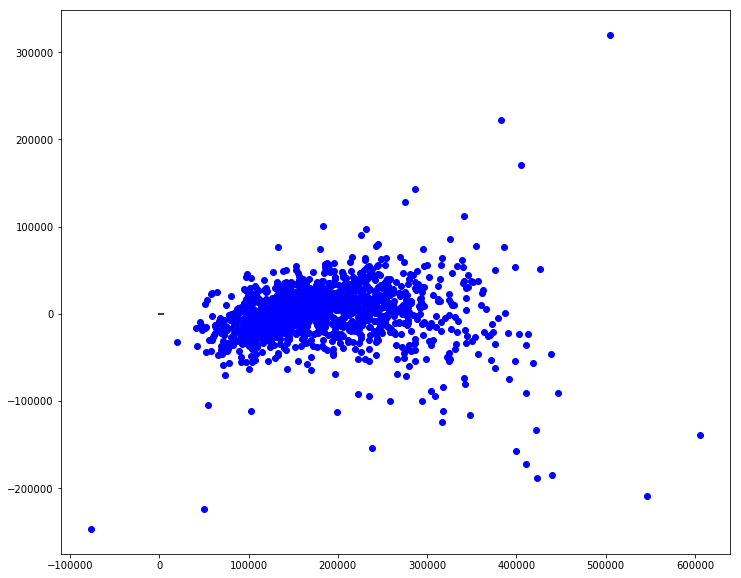

In [148]:
plt.figure(figsize=(12,10))
plt.scatter(lin_train_pred,(lin_train_pred-y_train),c='b')
plt.hlines(y=0,xmin=-1000,xmax=5000)
plt.show()

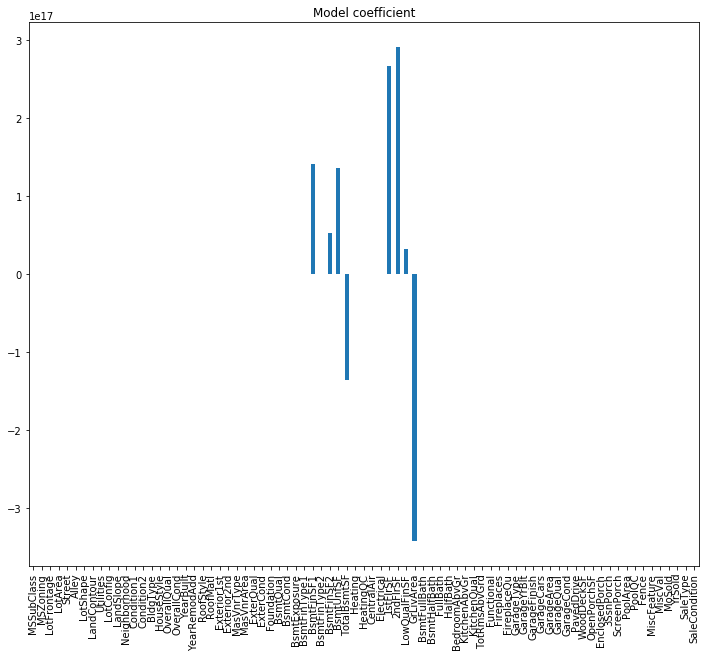

In [149]:
plt.figure(figsize=(12,10))
predictor_col = X_train.columns
coef = pd.Series(lin_reg.coef_,predictor_col)
coef.plot(kind='bar',title='Model coefficient')

In [150]:
def display_scores(scores):
    print('Scores',scores)
    print('Mean" ',scores.mean())
    print('std: ',scores.std())

In [151]:
from sklearn.model_selection import cross_val_score

scores_lin = cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
lin_rmse_scores = np.sqrt(-scores_lin)
display_scores(lin_rmse_scores)

Scores [3.05664967e+04 3.58187254e+04 3.30377156e+04 1.24019130e+16
 5.31418117e+04]
Mean"  2480382602505124.5
std:  4960765204933967.0


In [152]:
from sklearn.tree import DecisionTreeRegressor

Dtree_reg = DecisionTreeRegressor(random_state=42)
Dtree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [153]:
Dtree_train_pred = Dtree_reg.predict(X_train)
Dtree_mse = mean_squared_error(y_train,Dtree_train_pred)
Dtree_rmse = np.sqrt(Dtree_mse)

Dtree_mae = mean_absolute_error(y_train,Dtree_train_pred)
print('Train rmse : {} Train mae {}'.format(Dtree_rmse,Dtree_mae))

Train rmse : 0.0 Train mae 0.0


In [154]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=10,normalize=True)
ridgeReg.fit(X_train,y_train)
ridge_train_pred = ridgeReg.predict(X_train)

ridge_mse = mean_squared_error(y_train,ridge_train_pred)
ridge_rmse = np.sqrt(ridge_mse)

ridge_mae = mean_absolute_error(y_train,ridge_train_pred)

print('Train rmse : {} Train mae {}'.format(ridge_rmse,ridge_mae))

Train rmse : 50705.2458917927 Train mae 33413.028960512136


In [155]:
scores_ridge = cross_val_score(ridgeReg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
ridge_rmse_scores = np.sqrt(-scores_ridge)
display_scores(ridge_rmse_scores)

Scores [45041.20861401 50584.47163355 58383.28113228 44278.16590759
 55169.17079121]
Mean"  50691.25961573013
std:  5518.716053777169


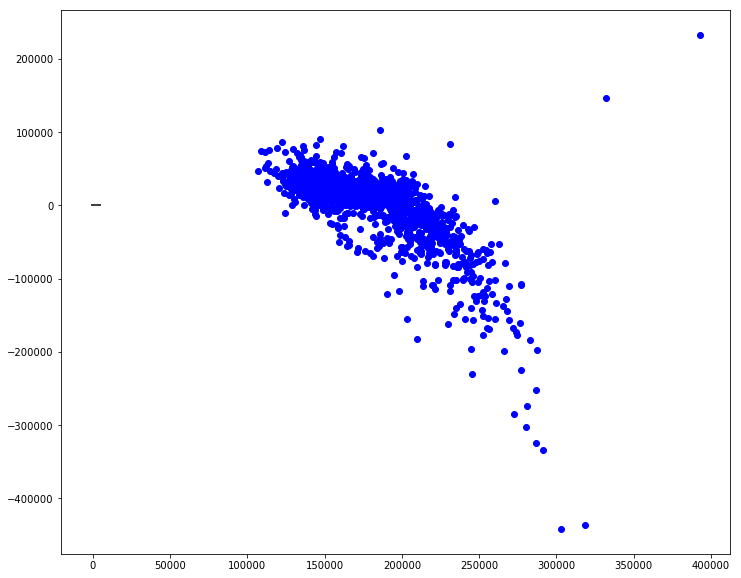

In [156]:
plt.figure(figsize=(12,10))
plt.scatter(ridge_train_pred,(ridge_train_pred-y_train),c='b')
plt.hlines(y=0,xmin=-1000,xmax=5000)
plt.show()

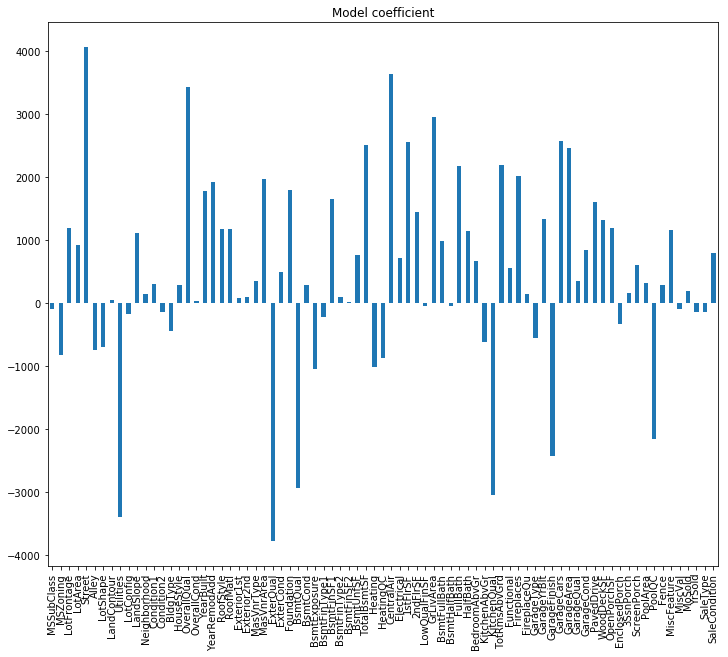

In [157]:
plt.figure(figsize=(12,10))
predictor_col = X_train.columns
coef = pd.Series(ridgeReg.coef_,predictor_col)
coef.plot(kind='bar',title='Model coefficient')

In [158]:
from sklearn.linear_model import Lasso
lasso_Reg = Lasso(alpha=2,normalize=True)
lasso_Reg.fit(X_train,y_train)
lasso_train_pred = lasso_Reg.predict(X_train)

lasso_mse = mean_squared_error(y_train,lasso_train_pred)
lasso_rmse = np.sqrt(lasso_mse)

lasso_mae = mean_absolute_error(y_train,lasso_train_pred)

print('Train rmse : {} Train mae {}'.format(lasso_rmse,lasso_mae))

Train rmse : 29312.063364680776 Train mae 18173.942650401004


In [159]:
scores_lasso = cross_val_score(lasso_Reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
lasso_rmse_scores = np.sqrt(-scores_lasso)
display_scores(lasso_rmse_scores)

Scores [29927.47146144 35280.52100406 32992.80655546 27154.12904867
 51726.63142029]
Mean"  35416.31189798372
std:  8605.920926954817


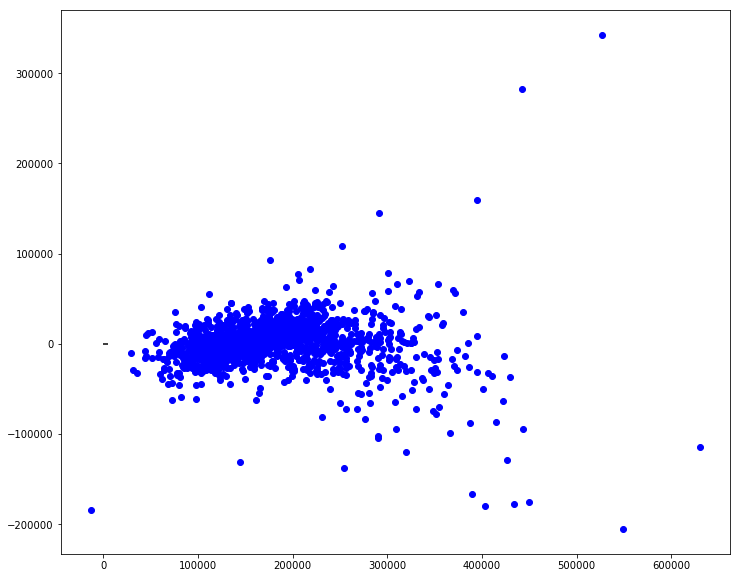

In [160]:
plt.figure(figsize=(12,10))
plt.scatter(lasso_train_pred,(lasso_train_pred-y_train),c='b')
plt.hlines(y=0,xmin=-1000,xmax=5000)
plt.show()

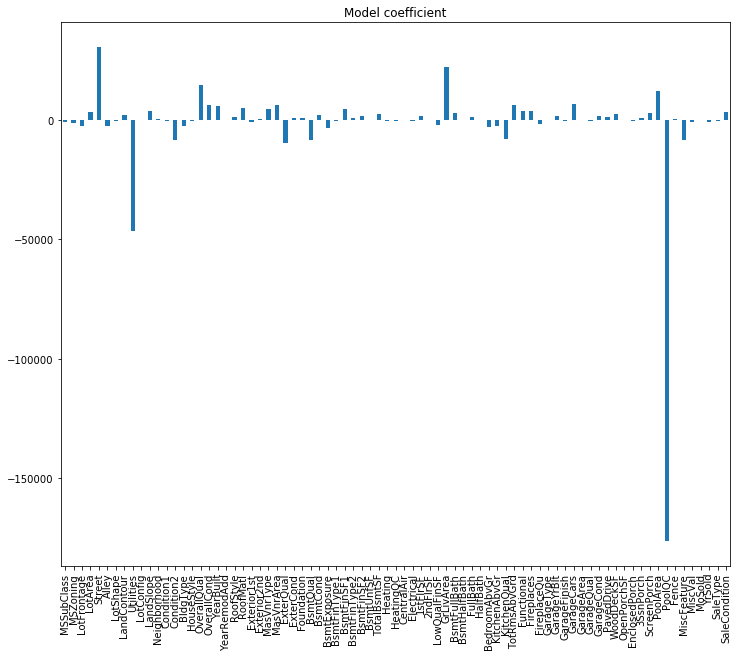

In [161]:
plt.figure(figsize=(12,10))
predictor_col = X_train.columns
coef = pd.Series(lasso_Reg.coef_,predictor_col)
coef.plot(kind='bar',title='Model coefficient')

In [170]:
from sklearn.linear_model import ElasticNet
EN_Reg = ElasticNet(alpha=5,l1_ratio=0.5,normalize=False)
EN_Reg.fit(X_train,y_train)


EN_train_pred = EN_Reg.predict(X_train)

EN_mse = mean_squared_error(y_train,EN_train_pred)
EN_rmse = np.sqrt(EN_mse)

EN_mae = mean_absolute_error(y_train,EN_train_pred)

print('Train rmse : {} Train mae {}'.format(EN_rmse,EN_mae))

Train rmse : 37867.19338676773 Train mae 22565.74371248491


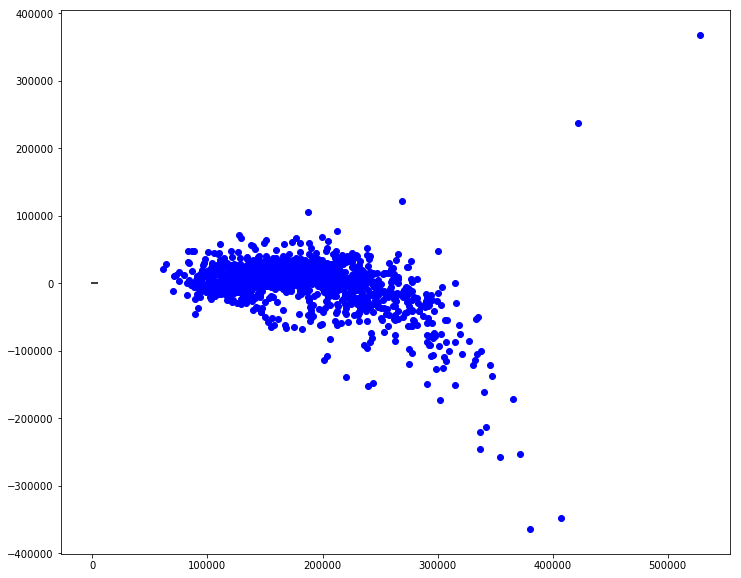

In [172]:
plt.figure(figsize=(12,10))
plt.scatter(EN_train_pred,(EN_train_pred-y_train),c='b')
plt.hlines(y=0,xmin=-1000,xmax=5000)
plt.show()

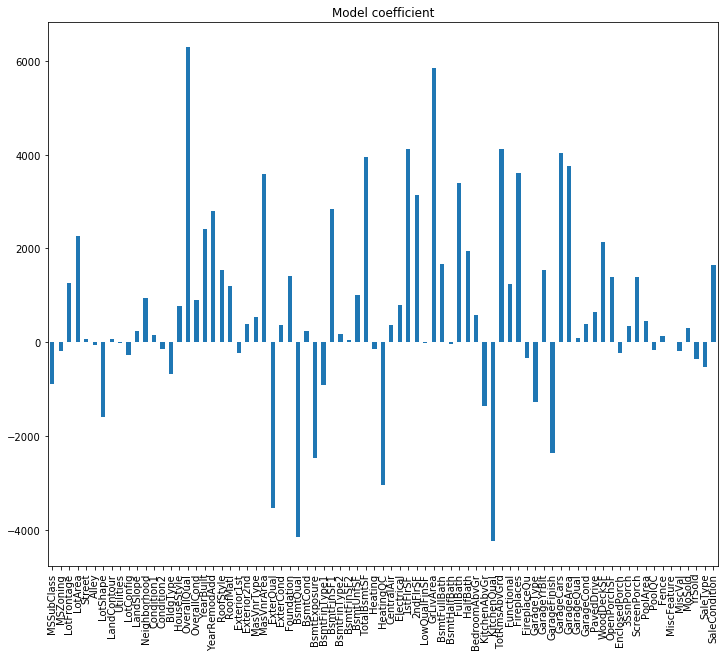

In [171]:
plt.figure(figsize=(12,10))
predictor_col = X_train.columns
coef = pd.Series(EN_Reg.coef_,predictor_col)
coef.plot(kind='bar',title='Model coefficient')

In [175]:
import xgboost as xgb

xgb_Reg = xgb.XGBRegressor()
xgb_Reg.fit(X_train,y_train)


xgb_train_pred = xgb_Reg.predict(X_train)

xgb_mse = mean_squared_error(y_train,xgb_train_pred)
xgb_rmse = np.sqrt(xgb_mse)

xgb_mae = mean_absolute_error(y_train,xgb_train_pred)

print('Train rmse : {} Train mae {}'.format(xgb_rmse,xgb_mae))

Train rmse : 15314.175888987174 Train mae 10840.538452482877


In [176]:
scores_xgb = cross_val_score(xgb_Reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
xgb_rmse_scores = np.sqrt(-scores_xgb)
display_scores(xgb_rmse_scores)

Scores [23164.8901002  31026.19573903 28534.36637448 22558.25439544
 26752.53296162]
Mean"  26407.247914153086
std:  3203.31606364445


In [ ]:
#create a pipeline for cleaning and modeling 